In [ ]:
# Final Calculations for Paper Text

This notebook contains calculations that are mentioned in the paper text

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from __future__ import print_function, division
import six, sys
sys.path.append('..'); import pathcustomize, about
about.about()

import waldo

Python 2.7.9 (default, Apr 14 2015 12:54:25) [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)] on linux2, Host: cody


In [3]:
import pathlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from waldo.conf import settings
from waldo.wio.experiment import Experiment

# Plan

1. Get WALDO to process these recordings
20130702_135704
20130702_135652


2. Gaps



3. collision detection
how many are two worms?



# examine GAP properties

In [4]:
gaps = pd.read_csv('/home/projects/worm_movement/Data/validation_screens/gap_validate.csv')
print(set(gaps['eid']))
gaps.head()

# Notes all potential gaps are scored. not just the ones that were completed during waldo

# FROM NICKS WORK
# In test sets, this threshold was determined to find 95% of the missing arcs between tracks created by the same animal
# while only introducint 5% of false positives.

set(['20130702_135704', '20130702_135652'])


,eid,from_blob,to_blob,ans,n_ans
0,20130702_135704,17480,17484,valid,1
1,20130702_135704,27374,27426,valid,1
2,20130702_135704,17408,17462,valid,1
3,20130702_135652,14068,14128,valid,1
4,20130702_135652,11364,11370,valid,1


In [5]:
# TODO

# FROM NICKS WORK
# In test sets, this threshold was determined to find 95% of the missing arcs between tracks created by the same animal
# while only introducint 5% of false positives.

In [6]:
eid1 = '20130702_135652'
eid2 = '20130702_135704'

#two_worms_135652 =  collisions[collisions['eid] = 20130702_135704]
gap2 = gaps[gaps['eid'] == eid2]
validgap2 = gap2[gap2['ans'] == 'valid'][['from_blob', 'to_blob']]
badgap2 = gap2[gap2['ans'] == 'invalid'][['from_blob', 'to_blob']]
validgap2.head()

,from_blob,to_blob
0,17480,17484
1,27374,27426
2,17408,17462
13,17608,17616
16,17489,17502


In [7]:
def check_gaps(eid, gaps=gaps):
    gap2 = gaps[gaps['eid'] == eid]
    validgap = gap2[gap2['ans'] == 'valid'][['from_blob', 'to_blob']]
    badgap = gap2[gap2['ans'] == 'invalid'][['from_blob', 'to_blob']]
    print(validgap.head())
    path2 = '/home/projects/worm_movement/Data/WALDO_Data3/{eid}/waldo/{eid}-terminals.csv'.format(eid=eid)
    terms = pd.read_csv(path2).set_index('bid')
    print(terms.head())

    val_data = []
    for i, (A, B) in validgap.iterrows():
        #print(i, A, B)
        # A = from_blob
        # B = to_blob
        A_row = terms.loc[A]
        B_row = terms.loc[B]
        dx = A_row['xN'] - B_row['x0'] 
        dy = A_row['yN'] - B_row['y0']
        dist = np.sqrt(dx**2 + dy**2)
        dt = B_row['t0'] - A_row['tN']
        m = dist * dt
        v = {'from_blob':A, 'to_blob':B, 'm': m, 'dt':dt, 'dist':dist}
        val_data.append(v)

    valid = pd.DataFrame(val_data)
    
    bad_data = []
    for i, (A, B) in badgap.iterrows():
        A_row = terms.loc[A]
        B_row = terms.loc[B]
        dx = A_row['xN'] - B_row['x0'] 
        dy = A_row['yN'] - B_row['y0']
        dist = np.sqrt(dx**2 + dy**2)
        dt = B_row['t0'] - A_row['tN']
        m = dist * dt
        b = {'from_blob':A, 'to_blob':B,  'm': m, 'dt':dt, 'dist':dist}
        bad_data.append(b)

    valid = pd.DataFrame(val_data)
    bad = pd.DataFrame(bad_data)
    return valid, bad
        
v, b = check_gaps(eid=eid2)

    from_blob  to_blob
0       17480    17484
1       27374    27426
2       17408    17462
13      17608    17616
16      17489    17502
          x0        y0    t0  f0        xN        yN       tN    fN
bid                                                                
1     47.974  1577.958  0.01   1    16.461  1752.882   26.186   578
2    642.525   454.716  0.01   1   330.281   483.201  306.419  7834
3    655.344  1314.345  0.01   1    49.897   782.953  159.188  4004
4    741.466  1447.223  0.01   1  1706.732  1168.659  154.322  3880
5    758.232  1300.295  0.01   1  1010.380  1370.109  323.390  8273


In [8]:
# eid= eid1
# path2 = '/home/projects/worm_movement/Data/WALDO_Data/{eid}/waldo/{eid}-terminals.csv'.format(eid=eid)
# terms = pd.read_csv(path2).set_index('bid')
# print(terms.loc[14068])
# print('\n\n\n')
# print(terms.loc[14128])

In [9]:
lower_lim = 55 # np.percentile(v['m'], 90)
print('using a limite of:', lower_lim)
true_pos = len(v[v['m'] < lower_lim])
false_pos = len(b[b['m'] < lower_lim])
print('we should get:')
print( 100. * true_pos / len(v), '% gaps connected')
print( 100. * false_pos / (false_pos + true_pos), '% false positives')

using a limite of: 55
we should get:
91.5343915344 % gaps connected
1.70454545455 % false positives


,dist,dt,from_blob,m,to_blob
count,378.000000,378.000000,378.000000,378.000000,378.000000
mean,4.619982,2.741008,13765.074074,18.914689,14101.166667
std,9.559743,2.772098,7015.660645,55.459019,7095.715214
min,0.021095,0.095000,1.000000,0.002806,96.000000
25%,0.401680,0.629000,8885.000000,0.339985,8966.750000
50%,1.080744,1.566000,16729.000000,1.921722,16735.000000
75%,3.809610,3.992750,17573.000000,11.580884,17604.000000
max,61.527338,11.437000,29462.000000,540.086833,40345.000000


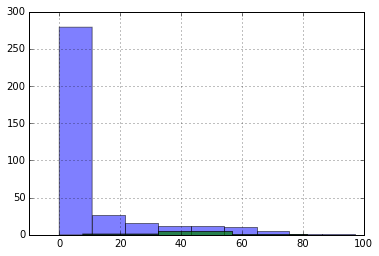

In [10]:
fig, ax = plt.subplots()

v['m'].hist(ax=ax, bins=50, alpha=0.5)
b['m'].hist(ax=ax, bins=200, alpha=0.7)
ax.set_xlim([-10, 100])
v.describe()

# Check gap accuracy

In [15]:
def check_gap_status(gap_df, eid):
    sum_path = '/home/projects/worm_movement/Data/WALDO_Data3/{eid}/waldo/{eid}-node-summary.csv'.format(eid=eid)
    node_comps = list(pd.read_csv(sum_path)['components'])
    node_comps = [[int(i) for i in comps.split('-')] for comps in node_comps]
    print(eid)
    #print(node_comps)
    data = []
    for i, (source, dest) in gap_df.iterrows():
        #print(i, source, dest)
        d = {'source_blob': source,
             'dest_blob':dest, 
             'source_node': 0, 
             'dest_node':0}

        for comps in node_comps:
            
            # record which node the source blob ended up inside
            if source in comps:
                if d['source_node'] != 0:
                    print('WARNING: source blob in multiple nodes!', source)
                d['source_node'] = comps[0]

            # record which node the dest blob ended up inside
            if dest in comps:
                if d['dest_node'] != 0:
                    print('WARNING: dest blob in multiple nodes!', dest)
                d['dest_node'] = comps[0]
    
        data.append(d)
    df = pd.DataFrame(data)
    df['same'] = df['source_node'] == df['dest_node']
    df['both_missing'] = (df['source_node'] == 0) & (df['dest_node'] == 0)
    df['one_missing'] = np.logical_or(df['source_node'] == 0, df['dest_node'] == 0)
    
    return df
   
def report_on_gap_status(gap_status_df):
    
    N = len(gap_status_df)
    same = len(gap_status_df[gap_status_df['same']])
    miss1 = len(gap_status_df[gap_status_df['one_missing']])
    miss2 = len(gap_status_df[gap_status_df['both_missing']])
    
    print()
    print(N, 'total')
    print(same, 'same')
    print(miss1, 'one_missing')
    print(miss2, 'both_missing')
    print(100. * same / N, '% of gaps connected')
    return N, same
    
 
def full_service(eid):

    eid_gap = gaps[gaps['eid'] == eid]
    #validgap = eid_gap[eid_gap['ans'] == 'valid'][['from_blob', 'to_blob']]
    #badgap = eid_gap[eid_gap['ans'] == 'invalid'][['from_blob', 'to_blob']]

    v, b = check_gaps(eid=eid)

    
    # include this?
    #     v = v.sort('m')
    #     print(len(v))
    #     v = v.drop_duplicates('from_blob')
    #     print(len(v))
    #     v = v.drop_duplicates('to_blob')
    #     print(len(v))
    validgap = v[['from_blob', 'to_blob']]
    badgap = b[['from_blob', 'to_blob']]

    val_df = check_gap_status(gap_df=validgap, eid=eid)
    val_df

    print('\nvalid')
    val_n, val_hits = report_on_gap_status(val_df)


    bad_df = check_gap_status(gap_df=badgap, eid=eid)
    bad_df

    print('\nbad')
    bad_n, bad_hits = report_on_gap_status(bad_df)

    total_hits = bad_hits + val_hits
    print()
    print(100. * bad_hits/ total_hits, '% false positives')

    

eid1 = '20130702_135652'
eid2 = '20130702_135704'


full_service(eid=eid1)
print('----------------------')
#full_service(eid=eid2)

   from_blob  to_blob
3      14068    14128
4      11364    11370
5      11671    11686
7      12796    12835
9      12831    12839
          x0       y0     t0  f0       xN       yN       tN     fN
bid                                                               
1    103.635  903.200  0.008   1   25.803  943.582   22.202    578
2    268.959  202.698  0.008   1  196.765  111.629  222.185   5591
3    339.601  231.110  0.008   1   27.893  259.535  452.036  11483
4    429.708  532.134  0.008   1  440.114  759.709   26.168    681
5    612.027  812.166  0.008   1  609.007  805.364   28.902    738
20130702_135652

valid

782 total
116 same
0 one_missing
0 both_missing
14.8337595908 % of gaps connected
20130702_135652

bad

243 total
4 same
0 one_missing
0 both_missing
1.64609053498 % of gaps connected

3.33333333333 % false positives
----------------------


# what is different between found / not found gaps?

In [269]:
v = v.sort('m')
v = v.drop_duplicates('from_blob')
v = v.drop_duplicates('to_blob')

172
172
163


In [278]:
eid1 = '20130702_135652'
eid2 = '20130702_135704'

eid = eid1
#two_worms_135652 =  collisions[collisions['eid] = 20130702_135704]
eid_gap = gaps[gaps['eid'] == eid]
validgap = eid_gap[eid_gap['ans'] == 'valid'][['from_blob', 'to_blob']]
badgap = eid_gap[eid_gap['ans'] == 'invalid'][['from_blob', 'to_blob']]

val_df = check_gap_status(gap_df=validgap, eid=eid)
# val_df
fixed = list(set(val_df[val_df['same'] == True]['source_blob']))
missed = list(set(val_df[val_df['same'] == False]['source_blob']))
print(len(fixed), len(missed))
v_gaps, b_gaps = check_gaps(eid=eid)

print(len(v_gaps))
f = v_gaps.set_index('from_blob').loc[fixed]
print(len(f), 'found')
m = v_gaps.set_index('from_blob').loc[missed]
print(len(m), 'missed')
#print(val_df.head(30))
#fixed_source_blobs
#v_gaps.head()

20130702_135652
113 299
   from_blob  to_blob
3      14068    14128
4      11364    11370
5      11671    11686
7      12796    12835
9      12831    12839
          x0       y0     t0  f0       xN       yN       tN     fN
bid                                                               
1    103.635  903.200  0.008   1   25.803  943.582   22.202    578
2    268.959  202.698  0.008   1  196.765  111.629  222.185   5591
3    339.601  231.110  0.008   1   27.893  259.535  452.036  11483
4    429.708  532.134  0.008   1  440.114  759.709   26.168    681
5    612.027  812.166  0.008   1  609.007  805.364   28.902    738
782
346 found
746 missed


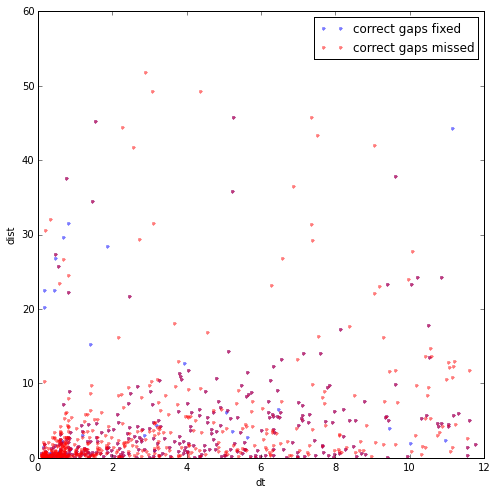

In [289]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(f['dt'], f['dist'], '.', color='blue', alpha=0.5, label='correct gaps fixed')
ax.plot(m['dt'], m['dist'], '.', color='red', alpha=0.5, label='correct gaps missed')
ax.set_xlabel('dt')
ax.set_ylabel('dist')
ax.legend()
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0442b5d190>]], dtype=object)

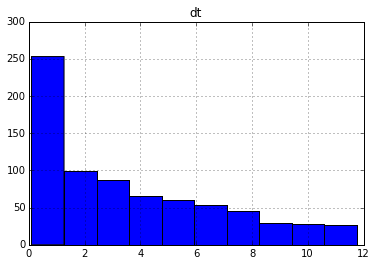

In [14]:
rpath1 = pathlib.Path('/home/projects/worm_movement/Data/WALDO_Data/20130702_135704/waldo/')
for i in rpath1.glob('*.csv'):
    print(i)

/home/projects/worm_movement/Data/WALDO_Data/20130702_135704/waldo/20130702_135704-node-summary.csv
/home/projects/worm_movement/Data/WALDO_Data/20130702_135704/waldo/20130702_135704-ends.csv
/home/projects/worm_movement/Data/WALDO_Data/20130702_135704/waldo/20130702_135704-report-card.csv
/home/projects/worm_movement/Data/WALDO_Data/20130702_135704/waldo/20130702_135704-roi.csv
/home/projects/worm_movement/Data/WALDO_Data/20130702_135704/waldo/20130702_135704-bounds.csv
/home/projects/worm_movement/Data/WALDO_Data/20130702_135704/waldo/20130702_135704-starts.csv
/home/projects/worm_movement/Data/WALDO_Data/20130702_135704/waldo/20130702_135704-missing.csv
/home/projects/worm_movement/Data/WALDO_Data/20130702_135704/waldo/20130702_135704-collisions.csv
/home/projects/worm_movement/Data/WALDO_Data/20130702_135704/waldo/20130702_135704-end_report.csv
/home/projects/worm_movement/Data/WALDO_Data/20130702_135704/waldo/20130702_135704-accuracy.csv
/home/projects/worm_movement/Data/WALDO_Dat

# COLLISIONS


### paper quotes
our analysis indicates that 91% of all collisions are between 2 worms.


in 8% of collisions involving two animals, the collision lasts for longer than 5 seconds.

In [15]:
collisions = pd.read_csv('/home/projects/worm_movement/Data/validation_screens/collision_validate.csv')
collisions.head()

,eid,bid,ans
0,20130702_135652,17571,10
1,20130702_135652,11746,20
2,20130702_135652,9663,20
3,20130702_135652,10021,20
4,20130702_135652,2378,10


In [16]:
possible_vals = [0, 5, 10, 15, 20, 25, 30, 35]
counts = []

print('\n')
print('answer\tcount')
for pv in possible_vals:
    c = len(collisions[collisions['ans'] == pv])
    print(pv, '\t', c)
    counts.append(c)
    
   
two_worm_count = counts[4]
more_than_two_count = sum(counts[5:])
print('\n')
print('total', sum(counts))
print('two worms', two_worm_count)
print('more than two worms:', more_than_two_count)

print('---> fraction of collisions with two worms:', two_worm_count / (two_worm_count + more_than_two_count))




answer	count
0 	 5
5 	 234
10 	 1353
15 	 64
20 	 2845
25 	 4
30 	 246
35 	 15


total 4766
two worms 2845
more than two worms: 265
---> fraction of collisions with two worms: 0.914790996785


## durations of collisions

In [24]:
eid1 = ''
eid2 = '20130702_135704'

#two_worms_135652 =  collisions[collisions['eid] = 20130702_135704]
two_worms2 =collisions[collisions['eid'] == eid2]
two_worms2 =collisions[collisions['ans'] == 20]
two_worms2
bids2 = list(two_worms2['bid'])
#bids2

In [41]:
# plan: go through the node-summary after waldo processes the video
path2 = '/home/projects/worm_movement/Data/WALDO_Data/{eid}/waldo/{eid}-terminals.csv'.format(eid=eid2)
node_data2 = pd.read_csv(path2)
#node_data2 = pd.read_csv('/home/projects/worm_movement/Data/WALDO_Data/20130702_135652')
node_data2.set_index('bid', inplace=True)

collision_durations2 = node_data2.loc[bids2]
collision_durations2['dt'] = collision_durations2['tN'] - collision_durations2['t0']

count_total = len(collision_durations2)
count_gt1s = len(collision_durations2[collision_durations2['dt'] > 1.0])
count_gt5s = len(collision_durations2[collision_durations2['dt'] > 5.0])
print('for:', eid2)
print('total collisions from', eid2, ':', count_total)
print('collisions last > 1s', eid2, ':', count_gt1s)
print('collisions last > 5s', eid2, ':', count_gt5s)
print('% collisions last > 5s', eid2, ':', 100 * count_gt5s/count_total , '%')

collision_durations2


for: 20130702_135704
total collisions from 20130702_135704 : 2845
collisions last > 1s 20130702_135704 : 447
collisions last > 5s 20130702_135704 : 230
% collisions last > 5s 20130702_135704 : 8.08435852373 %


,x0,y0,t0,f0,xN,yN,tN,fN,dt
bid,,,,,,,,,
11746,901.284,92.535,840.094,21623,901.284,92.535,840.094,21623,0.000
9663,270.003,494.932,625.826,16079,270.003,494.932,625.826,16079,0.000
10021,246.895,454.710,645.060,16582,246.709,454.934,645.094,16583,0.034
17675,1072.263,1956.564,1895.209,48748,1072.263,1956.564,1895.209,48748,0.000
8987,1193.833,1864.012,596.159,15314,1193.833,1864.012,596.159,15314,0.000
60028,922.490,1474.884,2991.491,73573,922.868,1474.214,2992.156,73583,0.665
47456,1207.151,1553.754,2724.819,68012,1207.536,1554.236,2726.186,68045,1.367
9903,280.969,440.375,636.593,16361,280.978,440.985,636.661,16363,0.068
7713,1316.283,1841.008,507.291,13004,1316.283,1841.008,507.291,13004,0.000


## outcomes of collisions

In [ ]:
outcome_index = pd.read_csv('/home/visitors/peterwinter/codes/WaldoLive/data/screen/outcomes/index.csv')
outcome_results = pd.read_csv('/home/visitors/peterwinter/codes/WaldoLive/data/screen/outcomes/true_20130702_135704.csv')

In [ ]:
outcome_index.head()

In [ ]:
outcome_results.head()